## Introduction to Regularization Techniques in Regression Analysis

* ```Ridge and Lasso regression``` are powerful techniques generally used for creating parsimonious(Controlled) models in presence of a large number of features. Here **large** can typically mean either of two things:
    * Large enough to enhance the tendency of a model to overfit (as low as 10 variables might cause overfitting)
    * Large enough to cause computational challenges. With modern systems, this situation might arise in case of millions or billions of features
    
**Ridge and Lasso work by penalizing the magnitude of coefficients of features along with minimizing the error between predicted and actual observations.These are called ‘regularization’ techniques. The key difference is in how they assign penalty to the coefficients:**

    * Ridge Regression:
        * Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
        * Minimization objective = LS Obj + α * (sum of square of coefficients)
        
    * Lasso Regression:
        * Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients
        * Minimization objective = LS Obj + α * (sum of absolute value of coefficients)
    
    LS Obj refers to ‘least squares objective’, i.e. the linear regression objective without regularization.
    
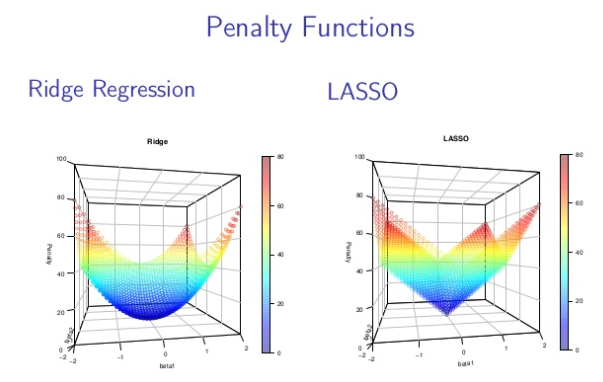

## Ridge Regression

* Ridge Regression is a technique used when the data suffers from multicollinearity (independent variables are highly correlated). In multicollinearity, even though the least squares estimates (OLS) are unbiased, their variances are large which deviates the observed value far from the true value. By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors.

**y = a + b*x + e(error term)**,  (error term is the value needed to correct for a prediction error between the observed and predicted value)

Ridge regression solves the multicollinearity problem through shrinkage parameter λ (lambda).
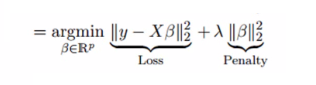

* In this equation, we have two components.
* First one is least square term.
* The other one is lambda of the summation of β2 (beta- square) where β is the coefficient.
* This is added to least square term in order to shrink the parameter to have a very low variance.


#### Assumptions: 
    * The assumptions of this regression is same as least squared regression except normality is not to be assumed
    * Ridge regression shrinks the value of coefficients but doesn’t reaches zero, which suggests no feature selection feature
    * This is a regularization method and uses l2 regularization.
    
    

## Lasso Regression

Similar to Ridge Regression, Lasso (Least Absolute Shrinkage and Selection Operator) also penalizes the absolute size of the regression coefficients. In addition, it is capable of reducing the variability and improving the accuracy of linear regression models.  Look at the equation below: Lasso regression differs from ridge regression in a way that it uses absolute values in the penalty function, instead of squares. This leads to penalizing (or equivalently constraining the sum of the absolute values of the estimates) values which causes some of the parameter estimates to turn out exactly zero. Larger the penalty applied, further the estimates get shrunk towards absolute zero. This results to variable selection out of given n variables.

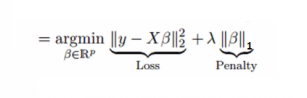

* **Important Points:**
    * The assumptions of lasso regression is same as least squared regression except normality is not to be assumed
    * Lasso Regression shrinks coefficients to zero (exactly zero), which certainly helps in feature selection
    * Lasso is a regularization method and uses l1 regularization
    * If group of predictors are highly correlated, lasso picks only one of them and shrinks the others to zero

## Elastic Net Regression

ElasticNet is hybrid of Lasso and Ridge Regression techniques. It is trained with L1 and L2 prior as regularizer. Elastic-net is useful when there are multiple features which are correlated. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

* A practical advantage of trading-off between Lasso and Ridge is that, it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

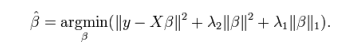

* **Important Points:**
    * It encourages group effect in case of highly correlated variables
    * There are no limitations on the number of selected variables
    * It can suffer with double shrinkage

In [1]:
# lets import the Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# lets read the dataset
data = pd.read_csv('boston/housing.csv')

# lets check the shape of the data
data.shape

(489, 4)

In [3]:
# lets check the head of the data
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
# lets separate the target and features

x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [5]:
# train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [6]:
# lets do standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [9]:
import sklearn
help(sklearn.linear_model)

Help on package sklearn.linear_model in sklearn:

NAME
    sklearn.linear_model - The :mod:`sklearn.linear_model` module implements a variety of linear models.

PACKAGE CONTENTS
    _base
    _bayes
    _cd_fast
    _coordinate_descent
    _huber
    _least_angle
    _logistic
    _omp
    _passive_aggressive
    _perceptron
    _ransac
    _ridge
    _sag
    _sag_fast
    _sgd_fast
    _stochastic_gradient
    _theil_sen
    base
    bayes
    cd_fast
    coordinate_descent
    huber
    least_angle
    logistic
    omp
    passive_aggressive
    perceptron
    ransac
    ridge
    sag
    sag_fast
    setup
    sgd_fast
    stochastic_gradient
    tests (package)
    theil_sen

CLASSES
    sklearn.base.BaseEstimator(builtins.object)
        sklearn.linear_model._huber.HuberRegressor(sklearn.linear_model._base.LinearModel, sklearn.base.RegressorMixin, sklearn.base.BaseEstimator)
        sklearn.linear_model._logistic.LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model

In [7]:
# lets apply Linear Regression first

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error is {0:.2f}".format(rmse))
r2 = r2_score(y_test, y_pred)
print("R2 Score is {0:.2f}".format(r2))

Root Mean Squared Error is 98628.10
R2 Score is 0.66


## Applying Ridge Regression

In [15]:
# lets check the parameters of Ridge Regression

help(sklearn.linear_model.Ridge)

Help on class Ridge in module sklearn.linear_model._ridge:

class Ridge(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, _BaseRidge)
 |  Linear least squares with l2 regularization.
 |  
 |  Minimizes the objective function::
 |  
 |  ||y - Xw||^2_2 + alpha * ||w||^2_2
 |  
 |  This model solves a regression model where the loss function is
 |  the linear least squares function and regularization is given by
 |  the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
 |  This estimator has built-in support for multi-variate regression
 |  (i.e., when y is a 2d-array of shape (n_samples, n_targets)).
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : {float, ndarray of shape (n_targets,)}, default=1.0
 |      Regularization strength; must be a positive float. Regularization
 |      improves the conditioning of the problem and reduces the variance of
 |      the estimates. Larger values specify stronge

In [14]:
# applying Ridge

from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

model = RidgeCV()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error is {0:.2f}".format(rmse))
r2 = r2_score(y_test, y_pred)
print("R2 Score is {0:.2f}".format(r2))

Root Mean Squared Error is 98360.77
R2 Score is 0.66


## Applying Lasso Regression

In [16]:
# lets check the parameters of lasso regression

help(sklearn.linear_model.Lasso)

Help on class Lasso in module sklearn.linear_model._coordinate_descent:

class Lasso(ElasticNet)
 |  Linear Model trained with L1 prior as regularizer (aka the Lasso)
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Technically the Lasso model is optimizing the same objective function as
 |  the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, optional
 |      Constant that multiplies the L1 term. Defaults to 1.0.
 |      ``alpha = 0`` is equivalent to an ordinary least square, solved
 |      by the :class:`LinearRegression` object. For numerical
 |      reasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.
 |      Given this, you should use the :class:`LinearRegression` object.
 |  
 |  fit_intercept : boolean, optional, default True
 |      Whether to calculate the intercept for t

In [17]:
# applying Lasso

from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score

model = LassoCV()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error is {0:.2f}".format(rmse))
r2 = r2_score(y_test, y_pred)
print("R2 Score is {0:.2f}".format(r2))

Root Mean Squared Error is 98543.46
R2 Score is 0.66


## Applying Elastic Net Regression

In [18]:
# lets check the parameters for Elastic Net Regression

help(sklearn.linear_model.ElasticNet)

Help on class ElasticNet in module sklearn.linear_model._coordinate_descent:

class ElasticNet(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
 |  Linear regression with combined L1 and L2 priors as regularizer.
 |  
 |  Minimizes the objective function::
 |  
 |          1 / (2 * n_samples) * ||y - Xw||^2_2
 |          + alpha * l1_ratio * ||w||_1
 |          + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
 |  
 |  If you are interested in controlling the L1 and L2 penalty
 |  separately, keep in mind that this is equivalent to::
 |  
 |          a * L1 + b * L2
 |  
 |  where::
 |  
 |          alpha = a + b and l1_ratio = a / (a + b)
 |  
 |  The parameter l1_ratio corresponds to alpha in the glmnet R package while
 |  alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio
 |  = 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable,
 |  unless you supply your own sequence of alpha.
 |  
 |  Read more i

In [38]:
# applying Elastic Net

from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

model = ElasticNet(alpha = 0.1, l1_ratio = 0.1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error is {0:.2f}".format(rmse))
r2 = r2_score(y_test, y_pred)
print("R2 Score is {0:.2f}".format(r2))

Root Mean Squared Error is 97942.93
R2 Score is 0.66
